In [1]:
import os, PIL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# visualization style
sns.set_style('darkgrid')
plt.rcParams["patch.force_edgecolor"] = True
plt.rc('xtick', labelsize=24) 
plt.rc('ytick', labelsize=24)

In [3]:
df = pd.read_csv('train_ship_segmentations.csv')

In [4]:
df['Ships'] = df['EncodedPixels'].notnull()
df = df.groupby('ImageId').sum().reset_index()
df['Path'] = df['ImageId'].apply(lambda filename: os.path.join('train/', filename))

df = df[['ImageId', 'Path', 'Ships']]
df.head()

,ImageId,Path,Ships
0,00003e153.jpg,train/00003e153.jpg,0.0
1,000155de5.jpg,train/000155de5.jpg,1.0
2,00021ddc3.jpg,train/00021ddc3.jpg,9.0
3,0002756f7.jpg,train/0002756f7.jpg,2.0
4,0002d0f32.jpg,train/0002d0f32.jpg,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104070 entries, 0 to 104069
Data columns (total 3 columns):
ImageId    104070 non-null object
Path       104070 non-null object
Ships      104070 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.4+ MB


In [6]:
df2 = pd.read_csv('train_ship_segmentations.csv')
df2 = df2.dropna().groupby("ImageId")[['EncodedPixels']].agg(lambda rle_code: ' '.join(rle_code)).reset_index()
df2['Path'] = df2['ImageId'].apply(lambda filename: os.path.join('train/', filename))
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29070 entries, 0 to 29069
Data columns (total 3 columns):
ImageId          29070 non-null object
EncodedPixels    29070 non-null object
Path             29070 non-null object
dtypes: object(3)
memory usage: 681.4+ KB


In [7]:
df2.head()

,ImageId,EncodedPixels,Path
0,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,train/000155de5.jpg
1,00021ddc3.jpg,101361 1 102128 3 102896 4 103663 6 104430 9 1...,train/00021ddc3.jpg
2,0002756f7.jpg,255784 2 256552 4 257319 7 258087 9 258854 12 ...,train/0002756f7.jpg
3,00031f145.jpg,340363 1 341129 4 341896 6 342663 7 343429 10 ...,train/00031f145.jpg
4,00053c6ba.jpg,565382 3 566144 9 566909 12 567677 13 568445 1...,train/00053c6ba.jpg


In [8]:
def rle_to_pixels(rle_code):
    rle_code = [int(i) for i in rle_code.split()]
    
    pixels = [(pixel_position % 768, pixel_position // 768) 
              for start, length in list(zip(rle_code[0:-1:2], rle_code[1::2])) 
              for pixel_position in range(start, start + length)]
        
    return pixels

def apply_mask(image, mask):
    for x, y in mask:
        image[x, y, [0, 1]] = 255
    return image

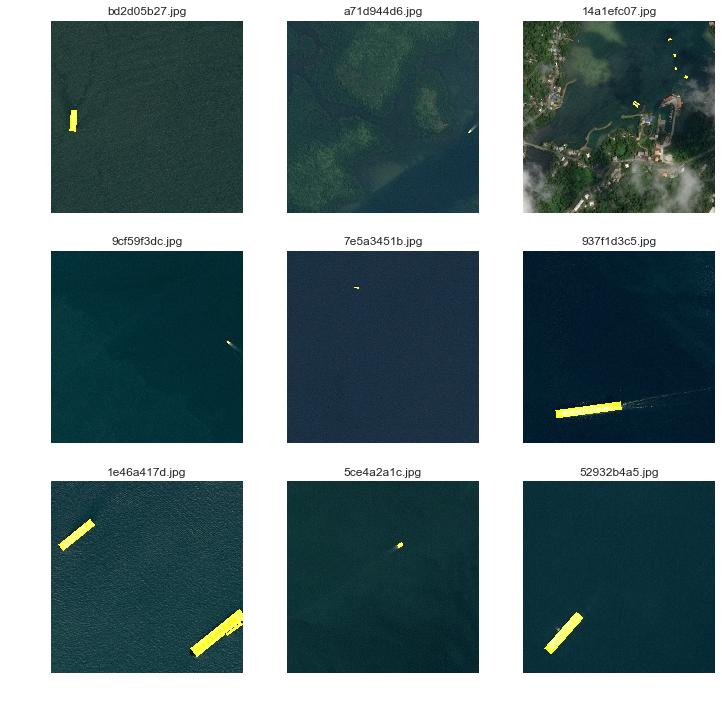

In [9]:
h, w = 3, 3

load_img = lambda path: np.array(PIL.Image.open(path))

fig, axes_list = plt.subplots(h, w, figsize=(4*h, 4*w))

for axes in axes_list:
    for ax in axes:
        ax.axis("off")
        path = np.random.choice(df2['Path'])
        img = apply_mask(load_img(path), rle_to_pixels(df2[df2['Path'] == path]['EncodedPixels'].iloc[0]))
        ax.imshow(img)
        ax.set_title(df2[df2['Path'] == path]['ImageId'].iloc[0])